In [12]:
import numpy as np
import matplotlib.pylab as pl
import os
import ot
import ot.plot
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import joblib
sys.path.append('../src/GOW')
from GOW import GOW_sinkhorn_autoscale

In [13]:
directory = "../Datasets/Weizmann/binary"

X = []
y = np.empty(80, dtype='<U9')

index = 0

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        X.append(joblib.load(f))
        y[index] = filename.split('_')[1]
        index = index + 1

In [14]:
X_train = X[0:40]
y_train = y[0:40]
X_test = X[40:80]
y_test = y[40:80]

In [15]:
seq1 = X_train[0]
seq2 = X_test[17]

print(y_train[0], y_test[17])

print(seq1.shape, seq2.shape)

n = seq1.shape[0]
m = seq2.shape[0]

x = np.arange(n, dtype=np.float64)

# distributions
a = np.ones(n) / n
b = np.ones(m) / m

bend walk
(84, 2450) (73, 2450)


Iterations: 5


[0.5514739994590442,
 0.5512590210492906,
 0.5512588650534918,
 0.5512589252324833,
 0.5512589204582333]

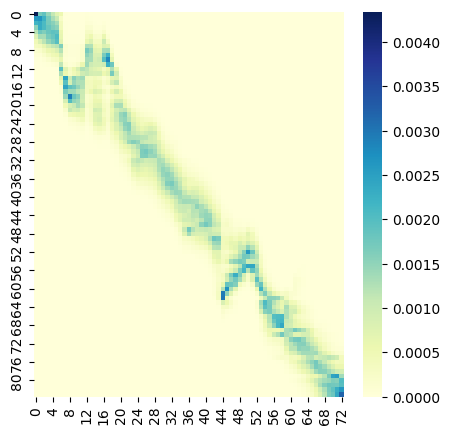

In [16]:
C = ot.dist(seq1, seq2, metric='minkowski')
C = C / C.max()
new_C, new_P, alpha, convergence_array = GOW_sinkhorn_autoscale(a, b, C, 8, 30, epsilon=0.00001, num_FW_iteration=10000, maxIter=30, return_convergence_array=True)

plt.figure(figsize=(5,5))
sns.heatmap(new_P, cmap="YlGnBu", annot=None)
convergence_array

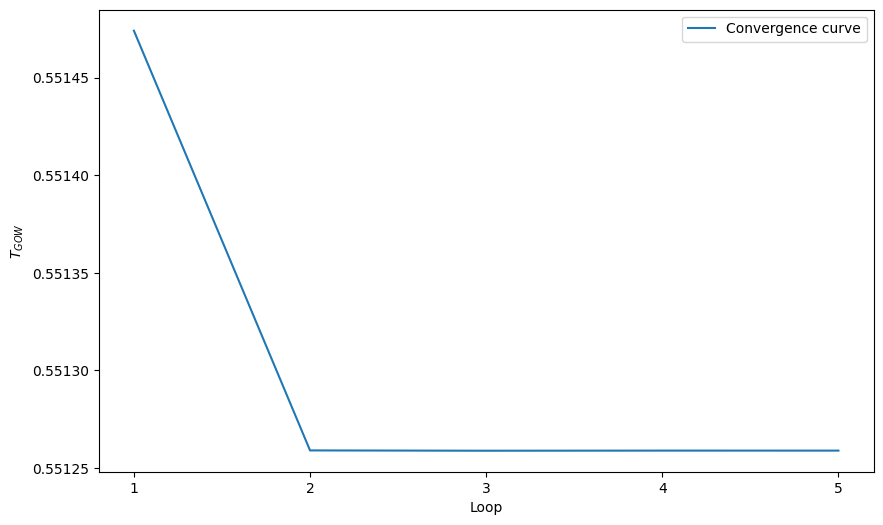

In [17]:
pl.figure(1, figsize=(10, 6))
xx = np.arange(len(convergence_array), dtype=np.float64) + 1
pl.xlabel('Loop')
pl.ylabel('$T_{GOW}$')
pl.plot(xx, convergence_array, label='Convergence curve')
pl.xticks(xx)
pl.legend()